In [367]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC

In [444]:
url='https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv'
df=pd.read_csv(url)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [445]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

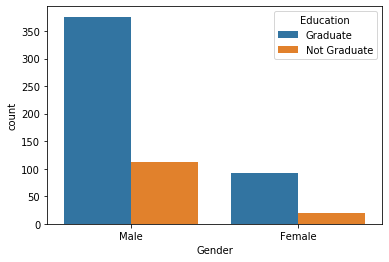

In [446]:
sns.countplot(x='Gender', data=df, hue='Education');

In [447]:
px.histogram(df, x="Gender", color="Property_Area")

In [448]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [449]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [450]:
#ndf=df.loc[(df['Gender'].isna()) & (df['Dependents']>='2')]

In [451]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

Counter({360.0: 512,
         120.0: 3,
         240.0: 4,
         342.0: 14,
         180.0: 44,
         60.0: 2,
         300.0: 13,
         480.0: 15,
         36.0: 2,
         84.0: 4,
         12.0: 1})

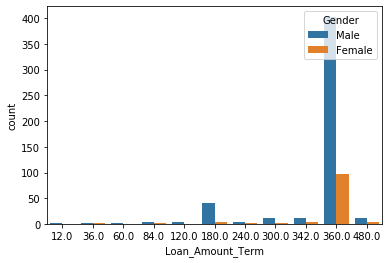

In [452]:
sns.countplot(x='Loan_Amount_Term',hue='Gender', data=df)
Counter((df['Loan_Amount_Term']))


In [453]:
df['Credit_History'].fillna(1, inplace=True)

In [454]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [455]:
Counter(df['Dependents'])

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [456]:
df['Dependents'].fillna('0',inplace=True)

In [457]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [458]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## EDA

In [459]:
px.histogram(df,x='Gender',color='Married')

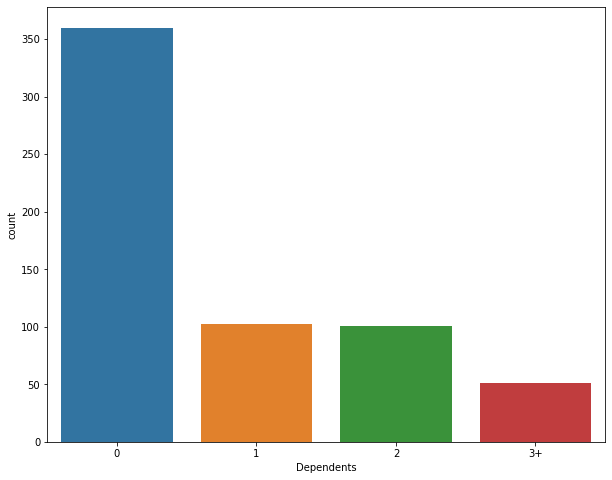

In [460]:
ax,fig=plt.subplots(figsize=[10,8])
sns.countplot(x='Dependents',data=df)

In [462]:
px.histogram(df,x='Education',color='Gender')

In [463]:
px.histogram(df,x='Property_Area', color='Married')

### Transformations

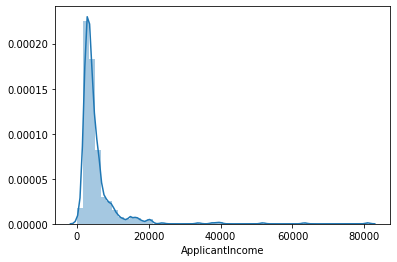

In [333]:
sns.distplot(df['ApplicantIncome'])
px.histogram(df,x='ApplicantIncome')

### Since the above distribution is not normalized, we would go ahead and use the log transformations

In [335]:
df['Applicant_Income_Log']=np.log(df['ApplicantIncome'])

In [337]:
df['CoApplicant_Income_Log']=np.log(df['CoapplicantIncome'])

/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



In [349]:
df['CoApplicant_Income_Log']=((df['CoApplicant_Income_Log'].astype('str')).replace('-inf','0')).astype('float')

In [350]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,CoApplicant_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,7.972466,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,8.320205,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8.996157,5.480639
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,8.933664,0.000000


In [352]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [356]:
df['Total_Income_Log']=np.log(df['Total_Income'])

In [382]:
#df['Loan_Amount_Log']=np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term'])

In [365]:
drop_col=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']
df.drop(columns=drop_col,axis=1, inplace=True)

In [366]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,CoApplicant_Income_Log,Total_Income_Log,Loan_Amount_Log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026,0.000000,8.674026,4.986426
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.430109,7.318540,8.714568,4.852030
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368,0.000000,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,7.856707,7.765569,8.505323,4.787492
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515,0.000000,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y,7.972466,0.000000,7.972466,4.262680
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y,8.320205,0.000000,8.320205,3.688879
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y,8.996157,5.480639,9.025456,5.533389
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y,8.933664,0.000000,8.933664,5.231109


### Label Encoding

In [369]:
lab_cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
le=LabelEncoder()
for col in lab_cols:
    df[col]=le.fit_transform(df[col])
        

In [383]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Applicant_Income_Log', 'CoApplicant_Income_Log', 'Total_Income_Log',
       'Loan_Amount_Log', 'Loan_Amount_Term_Log'],
      dtype='object')

In [374]:
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area','Loan_Amount_Term','Loan_Amount_Term_Log','Applicant_Income_Log', 'CoApplicant_Income_Log', 'Total_Income_Log',
       'Loan_Amount_Log','Loan_Status']]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term,Applicant_Income_Log,CoApplicant_Income_Log,Total_Income_Log,Loan_Amount_Log,Loan_Status
0,1,0,0,0,0,1,2,360.0,8.674026,0.000000,8.674026,4.986426,1
1,1,1,1,0,0,1,0,360.0,8.430109,7.318540,8.714568,4.852030,0
2,1,1,0,0,1,1,2,360.0,8.006368,0.000000,8.006368,4.189655,1
3,1,1,0,1,0,1,2,360.0,7.856707,7.765569,8.505323,4.787492,1
4,1,0,0,0,0,1,2,360.0,8.699515,0.000000,8.699515,4.948760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,360.0,7.972466,0.000000,7.972466,4.262680,1
610,1,1,3,0,0,1,0,180.0,8.320205,0.000000,8.320205,3.688879,1
611,1,1,1,0,0,1,2,360.0,8.996157,5.480639,9.025456,5.533389,1
612,1,1,2,0,0,1,2,360.0,8.933664,0.000000,8.933664,5.231109,1


In [385]:
df.drop('Loan_Amount_Term',axis=1, inplace=True)

In [388]:
df=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area','Loan_Amount_Term_Log','Applicant_Income_Log', 'CoApplicant_Income_Log', 'Total_Income_Log',
       'Loan_Amount_Log','Loan_Status']]

In [389]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term_Log,Applicant_Income_Log,CoApplicant_Income_Log,Total_Income_Log,Loan_Amount_Log,Loan_Status
0,1,0,0,0,0,1,2,5.886104,8.674026,0.000000,8.674026,4.986426,1
1,1,1,1,0,0,1,0,5.886104,8.430109,7.318540,8.714568,4.852030,0
2,1,1,0,0,1,1,2,5.886104,8.006368,0.000000,8.006368,4.189655,1
3,1,1,0,1,0,1,2,5.886104,7.856707,7.765569,8.505323,4.787492,1
4,1,0,0,0,0,1,2,5.886104,8.699515,0.000000,8.699515,4.948760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,5.886104,7.972466,0.000000,7.972466,4.262680,1
610,1,1,3,0,0,1,0,5.192957,8.320205,0.000000,8.320205,3.688879,1
611,1,1,1,0,0,1,2,5.886104,8.996157,5.480639,9.025456,5.533389,1
612,1,1,2,0,0,1,2,5.886104,8.933664,0.000000,8.933664,5.231109,1


In [392]:
X=df.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term_Log,Applicant_Income_Log,CoApplicant_Income_Log,Total_Income_Log,Loan_Amount_Log
0,1,0,0,0,0,1,2,5.886104,8.674026,0.000000,8.674026,4.986426
1,1,1,1,0,0,1,0,5.886104,8.430109,7.318540,8.714568,4.852030
2,1,1,0,0,1,1,2,5.886104,8.006368,0.000000,8.006368,4.189655
3,1,1,0,1,0,1,2,5.886104,7.856707,7.765569,8.505323,4.787492
4,1,0,0,0,0,1,2,5.886104,8.699515,0.000000,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,5.886104,7.972466,0.000000,7.972466,4.262680
610,1,1,3,0,0,1,0,5.192957,8.320205,0.000000,8.320205,3.688879
611,1,1,1,0,0,1,2,5.886104,8.996157,5.480639,9.025456,5.533389
612,1,1,2,0,0,1,2,5.886104,8.933664,0.000000,8.933664,5.231109


In [395]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Train-Test Split

In [396]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=42)

### Model Application:

In [428]:
models=[DecisionTreeRegressor(),
        LogisticRegression(),
        RandomForestClassifier(n_estimators=300,min_samples_split=25,max_depth=7),
        GradientBoostingClassifier(),
        ExtraTreesClassifier(),
        SVC(kernel='linear')]


In [441]:
def ml_classifier(X,y,model):
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=42)
    new=model.fit(X_train,y_train)
    y_pred=new.predict(X_test)
    cvs=cross_val_score(model,X,y,cv=5)
    print('For Model:',model,'Accuracy score is',accuracy_score(y_test,y_pred),'Cross Validation Score is',np.mean(cvs)*100,'\n')
    print(confusion_matrix(y_test,y_pred),'\n')

In [442]:
for model in models:
    ml_classifier(X,y,model)

For Model: DecisionTreeRegressor() Accuracy score is 0.6910569105691057 Cross Validation Score is -33.330726361817966 

[[20 23]
 [15 65]] 



/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/aman_mehrotra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/U

For Model: LogisticRegression() Accuracy score is 0.7886178861788617 Cross Validation Score is 80.9462881514061 

[[18 25]
 [ 1 79]] 

For Model: RandomForestClassifier(max_depth=7, min_samples_split=25, n_estimators=300) Accuracy score is 0.7886178861788617 Cross Validation Score is 80.45981607357056 

[[18 25]
 [ 1 79]] 

For Model: GradientBoostingClassifier() Accuracy score is 0.7560975609756098 Cross Validation Score is 78.66853258696523 

[[18 25]
 [ 5 75]] 

For Model: ExtraTreesClassifier() Accuracy score is 0.7804878048780488 Cross Validation Score is 76.05757696921232 

[[19 24]
 [ 3 77]] 

For Model: SVC(kernel='linear') Accuracy score is 0.7886178861788617 Cross Validation Score is 80.9462881514061 

[[18 25]
 [ 1 79]] 



### From the above observations we can say that the model with the best accuracy is either LogisticRegression or SVC and we can use either for our future predictions